# Customer Segmentation
mini project by Group 1 Data Science B - MyEduSolve

# Use Case

* **Use Case Summary**


* **Objective Statement** :

    * Get business insight about how many customers
    * Get business insight about the average, maximum and minimum amount by the customer 
    * Get business insight about how many orders by year
    * Get business insight for each customers based on labeled defined such as Loyal Customer, Big Spanders, Best Customers, Lost Cheap Customers and Almost Lost
    * Build models using RFM to learn customer segmentation  
    
    
* **Challanges** :
    * Large size of data, can not maintain by excel spreadsheet
    * Change the data type of column which doesn't match
    * Display data every year
    * Make a definition of each segment obtained
    * Don't know the location of retail data


* **Methodology / Analytic Technique** :
    * Descriptive analysis
        * Describe the information such as, min/max value of each column, average, and the total count of data contained in grand_total column.
    * Graph analysis
        * View data changes by time (Year)
    * Using Modelling Segementation 
        * RFM Model


* **Business Benefit**:

    * Gain insight to treat and keep customers based on segment
    * Gain insight to improve the quality of company services so that customers remain loyal and gain more profit for the company
    * Build models using RFM to know customer segement


* **Expected Outcome**:

    * Know how many customer?
    * Know how about the average, maximum and minimum amount issued by the customer?
    * Know how many orders by year
    * know how behavior customers based on labeled defined such as Loyal Customer, Big Spanders, Best Customers, Lost Cheap Customers and Almost Lost
    * Know how to build model using RFM

# Business Understanding
* Data orders is a company that sells good that can be ordered by customers in large quantities at once
- This case has some business question using the data:
    * How many customer?
    * How about the average, maximum and minimum amount issued by the customer?
    * How many orders by year?
    * How behavior customers based on labeled defined such as Loyal Customer, Big Spanders, Best Customers, Lost Cheap Customers and Almost Lost?
    * How to build model using RFM modelling?

# Data Understanding


* **Source Data**:
    * The dataset used is data from https://www.kaggle.com/datasets/siddinho/sample-orders-dataset-retail
    * Data start from January 4 2011 - Desember 31 2014
    * The raw data contains 5009 rows and 4 columns.


* **Data Dictionary** :
    * order_date : date of ordering items by customer
    * order_id : the transaction id of ordering items by the customer
    * customer: the name of the customer who made the purchase
    * grand_total : total price paid by customer

# Data Preparation

* **Code use**:
    * Python 3.9.13
    * Package: Pandas, Numpy, Matplotlib, Seaborn, Scipy, Sklearn, and Warning 

# Data Cleansing
   * Change data type from order of object to datetime
   * Retrieve data only month and year only

In [1]:
#! pip install feature_engine

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from datetime import datetime as dt2
from datetime import timedelta as td
from datetime import time as tm

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

import plotly.offline as pyoff
import plotly.graph_objs as go

import feature_engine
from feature_engine.outliers import Winsorizer

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import davies_bouldin_score

import warnings
warnings.filterwarnings("ignore")

# Data Profiling

**Load Dataset**

In [3]:
df = pd.read_csv("data_orders.csv")

**Preview Dataset**

In [4]:
df.head()

,order_date,order_id,customer,grand_total
0,9/7/2011,CA-2011-100006,Dennis Kane,378
1,7/8/2011,CA-2011-100090,Ed Braxton,699
2,3/14/2011,CA-2011-100293,Neil Franzšsisch,91
3,1/29/2011,CA-2011-100328,Jasper Cacioppo,4
4,4/8/2011,CA-2011-100363,Jim Mitchum,21


**Dataset Information**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_date   5009 non-null   object
 1   order_id     5009 non-null   object
 2   customer     5009 non-null   object
 3   grand_total  5009 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 156.7+ KB


**Check Missing Value**

In [6]:
df.isnull().sum()

order_date     0
order_id       0
customer       0
grand_total    0
dtype: int64

In [7]:
df.shape

(5009, 4)

In [8]:
df.isnull().sum()/df.shape[0]

order_date     0.0
order_id       0.0
customer       0.0
grand_total    0.0
dtype: float64

**Check unique value**

In [9]:
df.nunique()

order_date     1238
order_id       5009
customer        793
grand_total    1358
dtype: int64

from here it can be seen, **total customers are 793**. The number of Order_id turns out to be not the same as the number of Customers, so there are **some Order_ids that have the same Customers**. This shows that there are customers who **repeat orders** or do not only shop once at the company. **order_date** shows that there are several **transactions on the same day**

**Dataset Description**

In [10]:
df.describe()

,grand_total
count,5009.000000
mean,458.626672
std,954.729307
min,1.000000
25%,38.000000
50%,152.000000
75%,512.000000
max,23661.000000


Based on the data above, it is known that **on average** customers make product purchases with a total price of **458.626672**, the customer with the lowest purchase is rated **1** and the highest purchase is rated **23661**

**number 1** may get **high discount** for example black friday sale promo, and **23661** the possibility of buying items that are considered quite **expensive**

# Data Cleansing

In [11]:
#order_date

df['order_date'] = pd.to_datetime(df['order_date'])
df['OrderYearMonth'] = df['order_date'].map(lambda date: 100*date.year + date.month)
df['Date'] = df['order_date'].dt.strftime('%Y-%m')
df['Year'] = df['order_date'].dt.strftime('%Y')

change data type from order of object to datetime and 

In [12]:
df.head()

,order_date,order_id,customer,grand_total,OrderYearMonth,Date,Year
0,2011-09-07,CA-2011-100006,Dennis Kane,378,201109,2011-09,2011
1,2011-07-08,CA-2011-100090,Ed Braxton,699,201107,2011-07,2011
2,2011-03-14,CA-2011-100293,Neil Franzšsisch,91,201103,2011-03,2011
3,2011-01-29,CA-2011-100328,Jasper Cacioppo,4,201101,2011-01,2011
4,2011-04-08,CA-2011-100363,Jim Mitchum,21,201104,2011-04,2011


# Explorary Data Analysis

In [13]:
#timebound

print(df["order_date"].min())
print(df["order_date"].max())
print("The data is from 4 year transaction")

2011-01-04 00:00:00
2014-12-31 00:00:00
The data is from 4 year transaction


dataset, date **started from January 4, 2011**. terminated **until December 31, 2014**.

In [14]:
#Aggregating the Orders by Month

df_agg = df.groupby(["Year", "Date"]).order_id.count()
df_agg.head()

Year  Date   
2011  2011-01    31
      2011-02    29
      2011-03    71
      2011-04    66
      2011-05    69
Name: order_id, dtype: int64

In [15]:
df_agg = pd.DataFrame(df_agg)
df_agg = df_agg.reset_index()
df_agg.head()

,Year,Date,order_id
0,2011,2011-01,31
1,2011,2011-02,29
2,2011,2011-03,71
3,2011,2011-04,66
4,2011,2011-05,69


From this data, it can be seen that the total transactions in **January 2011** were **31 transactions**. **29 transactions** in **February 2011** and so on

In [16]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Quantity', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:Blue', marker='o')
    plt.show()

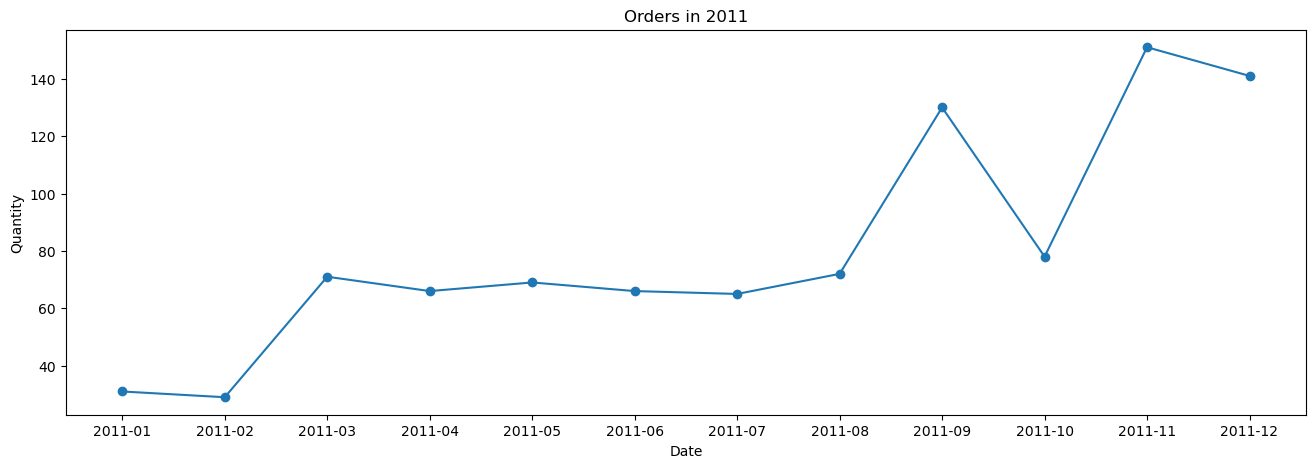

In [17]:
plot_df(df_agg.query("Year == '2011'"), x=df_agg.query("Year == '2011'").Date, y=df_agg.query("Year == '2011'").order_id, title='Orders in 2011')

The number of items purchased tends to **increase every mounth**. In **October** sales **declined sharply** but **increased** in the following month, even exceeding sales in September because normally In most countries in the Northern Hemisphere, **September is the time for students to start new school year at school**. **November's sales are high** because there are usually lots of **Black Friday** promotions. Meanwhile, sales in **December** experienced a **decline again**.

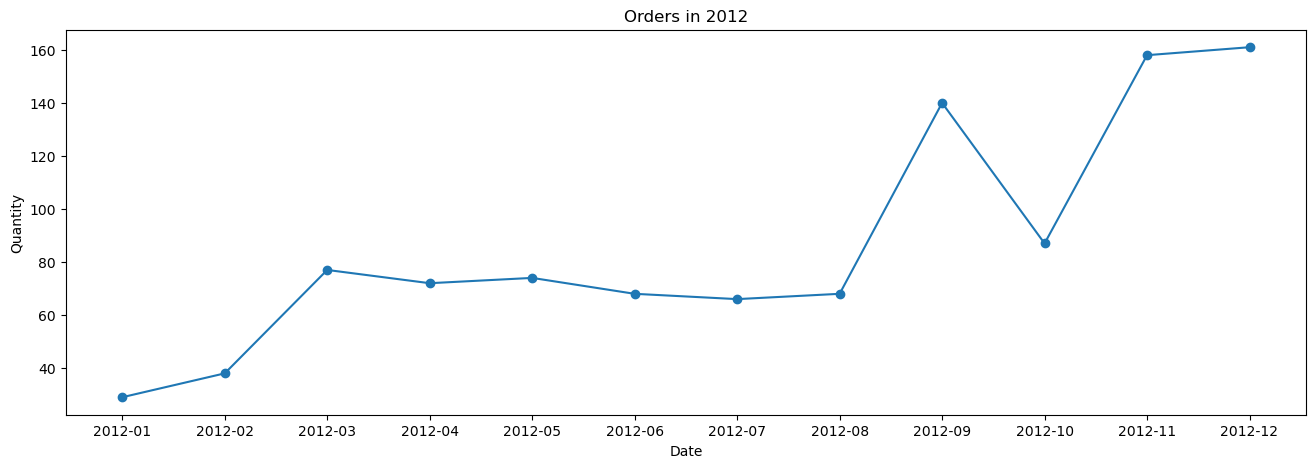

In [18]:
plot_df(df_agg.query("Year == '2012'"), x=df_agg.query("Year == '2012'").Date, y=df_agg.query("Year == '2012'").order_id, title='Orders in 2012')

The number of items purchased tends to **increase** every month, in **February to March** there is a sharp increase of up to **2 times**. In **September** there was **a sharp increase**. However, in the following month, **October, there was a sharp decline** because in that month, **started the new school year**. in **November** there was a high increase even higher than September and again **increased** because of **Black Friday**, and sales in **December** fell again

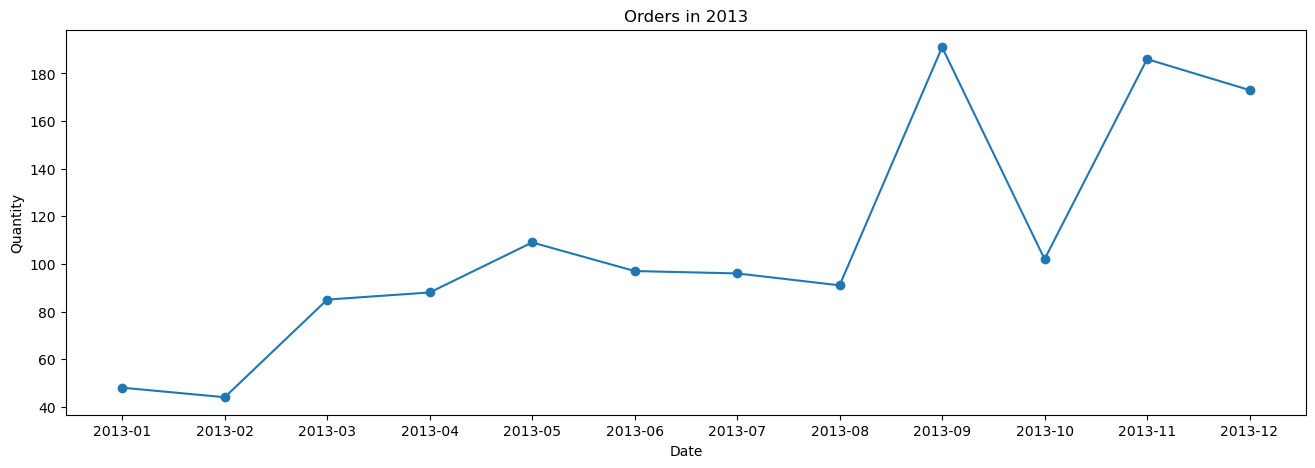

In [19]:
plot_df(df_agg.query("Year == '2013'"), x=df_agg.query("Year == '2013'").Date, y=df_agg.query("Year == '2013'").order_id, title='Orders in 2013')

The number of items purchased tends to **increase** every month, in **February to March** there is a fairly sharp increase to **almost 2 times**. In the month of **September** there was **a sharp increase** because many parents bought school supplies for their children. However, in the following month, **October, there was a sharp decline** due to **new school year**. However, in **November** there was a **high** increase in the number of items purchased because **Black Fiday** promos usually occur and again **slightly decreased** sales in **December**.

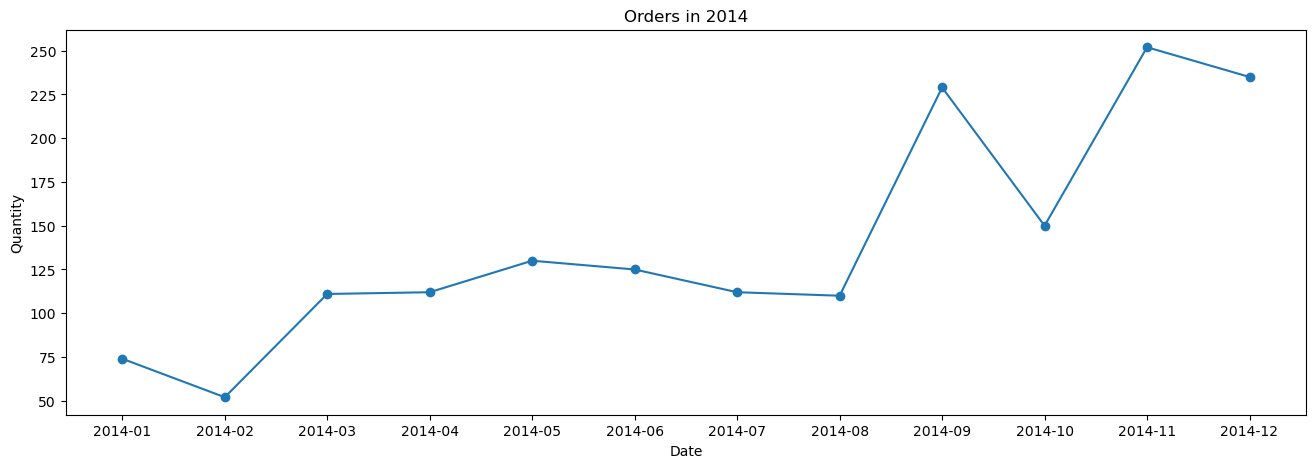

In [20]:
plot_df(df_agg.query("Year == '2014'"), x=df_agg.query("Year == '2014'").Date, y=df_agg.query("Year == '2014'").order_id, title='Orders in 2014')

The number of items purchased tends to **increase** every month, in **February to March** there is a fairly sharp increase to **almost 2 times**. In September there is a sharp increase in the new school year. However, in the following month, **October, there was a sharp decline**. However, in November **November there was a high increase** in the number of items purchased even **higher than September** due to Black Friday and again **slightly decreased** sales in **December**

In [21]:
df_year = df.groupby(df.order_date.dt.year).grand_total.sum()
df_year = pd.DataFrame(df_year)
df_year = df_year.reset_index()
df_year.head()

,order_date,grand_total
0,2011,484260
1,2012,470539
2,2013,608477
3,2014,733985


   order_date  grand_total  percent
0        2011       484260     21.0
1        2012       470539     20.0
2        2013       608477     26.0
3        2014       733985     32.0


<AxesSubplot:xlabel='order_date', ylabel='grand_total'>

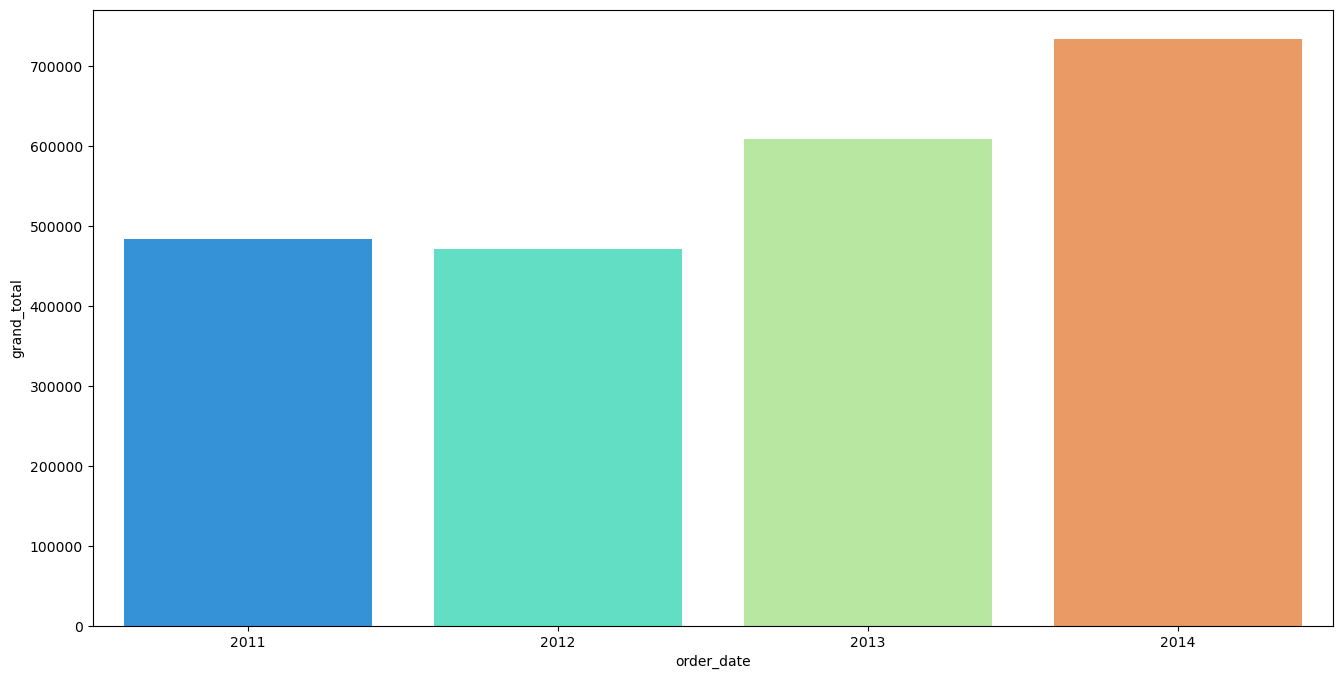

In [22]:
data = df_year
data['percent'] = round(data['grand_total']*100/data['grand_total'].sum())
print(data)
plt.figure(figsize=(16,8))
sns.barplot(data = df_year, palette='rainbow', x = 'order_date', y = 'grand_total')

In the barchart above, you can see how much the order increases each year. In **2011** with a grand total of **484260** with a value of **percentage of 21%**. In **2012** with a grand total of **470539** with a percentage value of 20%. In 2013 with a grand total of 608477 with a percentage value of 26%. and in 2014 with a grand total of 733985 with a percentage value of 32%.

# Prepocessing Modeling

# RFM Analysis

Recensy Frequency Monetary (RFM)

RFM analysis allows you to segment customers by the frequency and value of purchases and identify those customers who append the most money.

Recency - how long it's been since a customer bought something from us.

Frequency - how often a customer buys from us

Monetary value - the total value of purchases a customer has made.

In [23]:
#timebound

print(df['order_date'].min())
print(df['order_date'].max())
print('The data is 4 year transaction')

2011-01-04 00:00:00
2014-12-31 00:00:00
The data is 4 year transaction


from 'order_data' data, data **starts on January 4, 2011**, ends on **December 31, 2014**

In [24]:
NOW = dt.date(2014,12,31)
df['Date'] = pd.DatetimeIndex(df.order_date).date

In [25]:
#Recency

df_recency = df.groupby(['customer'],as_index=False)['Date'].max()
df_recency.columns = ['Customer','Last_Purchase_Date']

df_recency['Recency'] = df_recency.Last_Purchase_Date.apply(lambda x:(NOW - x).days)
df_recency.drop(columns=['Last_Purchase_Date'],inplace=True)
df_recency.head()

,Customer,Recency
0,Aaron Bergman,415
1,Aaron Hawkins,12
2,Aaron Smayling,88
3,Adam Bellavance,54
4,Adam Hart,34


see an example of this data, **Aaron Bergman** last **shopped 415 days ago**, indicated churn. Meanwhile, **Aaron Hawkins** last **shopped 12 days ago**

In [26]:
#Frequency - Monetary

FM_Table = df.groupby('customer').agg({'order_id':lambda x:len(x),
                                        'grand_total':lambda x:x.sum()})
FM_Table.rename(columns = {'order_id' :'Frequency',
                           'grand_total':'Monetary'},inplace= True)
FM_Table.head()

,Frequency,Monetary
customer,,
Aaron Bergman,3,887
Aaron Hawkins,7,1744
Aaron Smayling,7,3050
Adam Bellavance,8,7756
Adam Hart,10,3249


looking at an example of this data, **Aaron Bergman** last spent **3 transactions** and **amount 887**. Meanwhile, **Aaron Hawkins** **7 transactions** and **amount 1744**

In [27]:
RFM_Table = df_recency.merge(FM_Table,left_on='Customer',right_on='customer')
RFM_Table.head()

,Customer,Recency,Frequency,Monetary
0,Aaron Bergman,415,3,887
1,Aaron Hawkins,12,7,1744
2,Aaron Smayling,88,7,3050
3,Adam Bellavance,54,8,7756
4,Adam Hart,34,10,3249


see an example of this data, **Aaron Bergman** last **shopped 415 days ago** and at that time he spent **3 transactions** and **amount 887**. Meanwhile, **Aaron Hawkins** last **shopped 12 days ago** **7 transactions** and **amount 1744**

# Modelling
## RFM 

we will assign score from 1 to 4 to each Recency, Frequency, and Monetary respectively

**1** is the **highest value**, and **4** is **the lowest value**

A final RFM Score (Overall Value) is calculate simply by combining individual RFM score numbers

In [28]:
quantiles = RFM_Table.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [29]:
segmented_rfm = RFM_Table.copy()

In [30]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2 
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3 
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [31]:
segmented_rfm['R_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency', quantiles))
segmented_rfm['F_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency', quantiles))
segmented_rfm['M_quartile'] = segmented_rfm['Monetary'].apply(FMScore, args=('Monetary', quantiles))

segmented_rfm.head(10)

,Customer,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
0,Aaron Bergman,415,3,887,4,4,4
1,Aaron Hawkins,12,7,1744,1,2,3
2,Aaron Smayling,88,7,3050,3,2,2
3,Adam Bellavance,54,8,7756,2,2,1
4,Adam Hart,34,10,3249,2,1,2
5,Adam Shillingsburg,28,9,3256,1,1,2
6,Adrian Barton,41,10,14474,2,1,1
7,Adrian Hane,60,7,1734,2,2,3
8,Adrian Shami,41,2,59,2,4,4
9,Aimee Bixby,41,5,968,2,4,4


**the bigger the number in R_quartile**, then it proves that the customer is **the longer they haven't shopped**. while **the smaller the number in the R_quartile**, it proves that the customer **the more recently shopped**.

From this example, it can be seen, Aaron Bergman last shopped **415 days ago**, because it's been a while, he got an R_quartile 4, while Aaron Hawkins last shopped **12 days ago**, he got an R_quartile 1 .

**the bigger the number in F_quartile**, then it proves that the customer is **the less frequency he shopped**. while **the smaller the number in F_quartile**, it proves that the customer **the more frequency he shopped**.

Likewise for **M_quartile**, **the bigger the number in M_quartile**, then it proves that the customer is **the smaller the amount spent**. while **the smaller the number in M_quartile**, it proves that the customer **the more amount he spends for shopping**.

In [32]:
segmented_rfm['RFM_Segment'] = segmented_rfm.R_quartile.map(str)+segmented_rfm.F_quartile.map(str)+segmented_rfm.M_quartile.map(str)

In [33]:
segmented_rfm.head()

,Customer,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment
0,Aaron Bergman,415,3,887,4,4,4,444
1,Aaron Hawkins,12,7,1744,1,2,3,123
2,Aaron Smayling,88,7,3050,3,2,2,322
3,Adam Bellavance,54,8,7756,2,2,1,221
4,Adam Hart,34,10,3249,2,1,2,212


In [34]:
segmented_rfm['RFM_Score'] = segmented_rfm[['R_quartile','F_quartile','M_quartile']].sum(axis=1)

In [35]:
segmented_rfm.head()

,Customer,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
0,Aaron Bergman,415,3,887,4,4,4,444,12
1,Aaron Hawkins,12,7,1744,1,2,3,123,6
2,Aaron Smayling,88,7,3050,3,2,2,322,7
3,Adam Bellavance,54,8,7756,2,2,1,221,5
4,Adam Hart,34,10,3249,2,1,2,212,5


In [36]:
segmented_rfm['RFM_Segment'].unique()

array(['444', '123', '322', '221', '212', '112', '211', '223', '244',
       '124', '121', '243', '111', '141', '424', '314', '442', '132',
       '344', '441', '144', '114', '343', '133', '443', '131', '142',
       '324', '231', '411', '321', '333', '311', '312', '222', '323',
       '122', '412', '433', '334', '341', '342', '143', '232', '233',
       '234', '434', '413', '134', '331', '421', '241', '213', '313',
       '431', '242', '423', '332', '113', '432', '224', '422'],
      dtype=object)

# Label

In [37]:
print('Best Customers : ', len(segmented_rfm[segmented_rfm['RFM_Segment']=='111']))
print('Loyal Customers : ', len(segmented_rfm[segmented_rfm['F_quartile']==1]))
print('Big Spenders : ', len(segmented_rfm[segmented_rfm['M_quartile']==1]))
print('Almost Lost : ', len(segmented_rfm[segmented_rfm['RFM_Segment']=='134']))
print('Lost Customers : ', len(segmented_rfm[segmented_rfm['RFM_Segment']=='344']))
print('Lost Cheap Customers : ', len(segmented_rfm[segmented_rfm['RFM_Segment']=='444']))

Best Customers :  30
Loyal Customers :  159
Big Spenders :  198
Almost Lost :  2
Lost Customers :  31
Lost Cheap Customers :  67


In [38]:
# Setting up the label for each client and adding column 'label' to the dataframe

label = [0] * len(segmented_rfm)

for i in range(0,len(segmented_rfm)):
    
    if segmented_rfm['RFM_Segment'][i] == '111':
        label[i] = 'Best Customers'    
    elif segmented_rfm['RFM_Segment'][i] == '134':
        label[i] = 'Almost Lost'
    elif segmented_rfm['RFM_Segment'][i] == '344':
        label[i] = 'Lost Customers'
    elif segmented_rfm['RFM_Segment'][i] == '444':
        label[i] = 'Lost Cheap Customers'
    elif segmented_rfm['F_quartile'][i] == 1:
        label[i] = 'Loyal Customers'
    elif segmented_rfm['M_quartile'][i] == 1:
        label[i] = 'Big Spenders'
    else:
        label[i] = "Others"

In [39]:
# Adding the 'lavel' column to our dataframe

segmented_rfm['Label'] = label

In [40]:
# count the frequency that a value accurs in a dataframe column for the label

segmented_rfm['Label'].value_counts()

Others                  409
Loyal Customers         129
Big Spenders            125
Lost Cheap Customers     67
Lost Customers           31
Best Customers           30
Almost Lost               2
Name: Label, dtype: int64

<AxesSubplot:xlabel='Label', ylabel='Customer'>

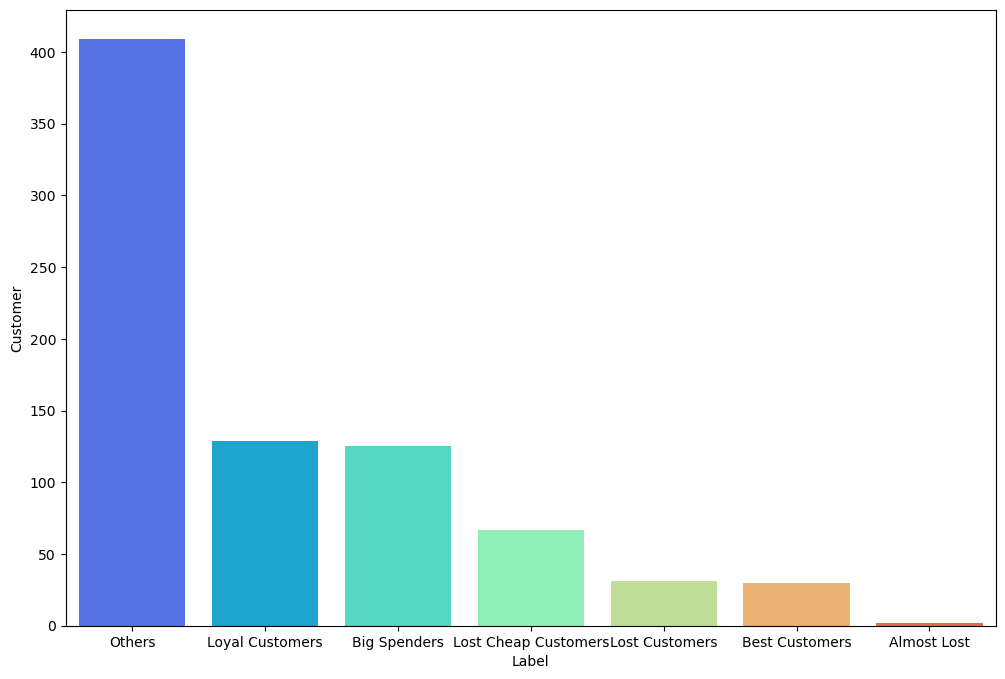

In [43]:
sq1 = segmented_rfm.groupby('Label')['Customer'].nunique().sort_values(ascending = False).reset_index()
plt.figure(figsize=(12,8))
#sq1.drop([0],inplace=True) # buat ngilangin others
sns.barplot(data = sq1, x = 'Label', y = 'Customer', palette = 'rainbow')

There are 7 customer segmentation based on RFM. Segmentation of **loyal customers** has the **highest number**. Then **lost cheap customers** have **more** than the best customers and **almost lost** customers have the **least** number. From these data, customers often place orders with a large number of orders.

* Based on **results of modeling** customer segmentation **using RFM**, the company's customers are divided into 7 segments, namely **Loyal Customers, Big Spanders, Lost Cheap Customers, Best Customers, Almost Lost**, and others.

    A total of **16.27% of the total customers** (with a total of 129 customers) are included in **Loyal Customers** where this segment's customers have the most shopping frequency than other segments.

    Furthermore, **15.76% of the total customers** (with a total of 125 customers) in the company entered the **Big Spenders** segment. This segment has the highest total purchases than any other segment.

    **Lost Cheap Customers** segment consists of 67 customers with a percentage of **8.44% of the total customers**. Customers who enter this type of segment tend to churn because they have not bought goods from the company for a long time, have the least frequency of shopping, and have the least total purchases compared to other segments.

    Then as much as **3.9% of total customers** (with a total of 31 customers) are classified as **Lost Customers** which is almost the same as customers in the Lost Cheap Customers segment, Lost Customers tend to churn.

    A total of 30 customers with a percentage of **3.78% of the total customers**, entered the **Best Customer** segment. Customers in this segment have recently purchased goods from the company, have the most shopping frequency, and have the most total purchases than other segments.

    Then **0.25% of the total customers** (with a total of 2 customers) are customers who enter the **Almost Lost** segment. Customers in the Almost Lost segment have recently purchased goods from the company, but have quite a bit of shopping frequency, and the lowest total purchases compared to other segments.

    Lastly, other customers are classified into **Others** segment, where this segment is a mixed segment (in this case **undefined segment**).

In [42]:
Others = 409
Loyal_Customers = 129
Big_Spenders = 125
Lost_Cheap_Customers = 67
Lost_Customers = 31
Best_Customers = 30
Almost_Lost = 2

total = Others + Loyal_Customers + Big_Spenders + Lost_Cheap_Customers + Lost_Customers + Best_Customers + Almost_Lost

p_other = Others / total * 100
p_loyal = Loyal_Customers / total * 100
p_big = Big_Spenders / total * 100
p_lcc = Lost_Cheap_Customers / total * 100
p_lc = Lost_Customers / total * 100
p_best = Best_Customers / total * 100
p_al = Almost_Lost / total * 100
print(f"Persentase 'Others' sebesar {p_other}%")
print(f"Persentase 'Loyal Customers' sebesar {p_loyal}%")
print(f"Persentase 'Big Spenders' sebesar {p_big}%")
print(f"Persentase 'Lost Cheap Customers' sebesar {p_lcc}%")
print(f"Persentase 'Lost Customers' sebesar {p_lc}%")
print(f"Persentase 'Best Customers' sebesar {p_best}%")
print(f"Persentase 'Almost Lost' sebesar {p_al}%")

Persentase 'Others' sebesar 51.576292559899116%
Persentase 'Loyal Customers' sebesar 16.26733921815889%
Persentase 'Big Spenders' sebesar 15.762925598991174%
Persentase 'Lost Cheap Customers' sebesar 8.448928121059268%
Persentase 'Lost Customers' sebesar 3.909205548549811%
Persentase 'Best Customers' sebesar 3.783102143757881%
Persentase 'Almost Lost' sebesar 0.25220680958385877%


# Result

1. The **total of customers is 793**. The number of Order_id turns out to be not the same as the number of Customers, so there are **some Order_ids that have the same Customers**. This shows that there are customers who **repeat orders** or do not only shop once at the company. **order_date** shows that there are several **transactions on the same day**

2. **The average** purchasing amount from the customers is **458.626672**, while the **lowest** purchasing amount was rated **1** and the **highest** purchase was rated **23661**.

3. We start the analysis in **2011**, the number of items purchased tends to **increase every month**. In **October** sales **declined sharply**, then **increased** in the following month, even exceeding sales in September because normally In most countries in the Northern Hemisphere, **September is the time for students to start the new school year at school**. **November's sales are high** because there are usually lots of **Black Friday** promotions. Meanwhile, sales in **December** experienced a **decline again**.
   
* Next to **2012**, same as 2011 the transaction tends to **increase** every month, from the EDA in **February to March** there is a fairly sharp increase of customer purchases up to **2 times**. After that, in **September** there was **a sharp increase**. However, in the following month, **October, there was a sharp decline** because, in that month, the consumer price index (CPI) was raised. in **November** there was a high increase even higher than in September and again **increased** because of **Black Friday**, and sales in **December** fell again


* Similarly in **2013**, the number of items purchased tends to **increase** every month, for the **February to March** there is a fairly sharp increase to **almost 2 times**. In the month of **September**, there was **a sharp increase** probably because many parents bought school supplies for their children. However, in the following month, **October, there was a sharp decline** due to the raise of the consumer price index (CPI) based on the Bureau of Labor Statistics (BLS). However, in **November** there was a **significant** increase in the number of items purchased because **Black Friday** promos usually occur and again **slightly decreased** sales in **December**.


* Lastly for **2014**, the number of items purchased tends to **increase** every month, in **February to March** there is a sharp increase to **almost 2 times**. In September there is a sharp increase in the new school year. In the following month, based on BLS the CPI was an increase, so that **October, there was a sharp decline**. However, in November **November there was a high increase** in the number of items purchased even **higher than in September** due to Black Friday and again **slightly decreased** sales in **December**


4. Based on **results of modeling** customer segmentation **using RFM**, the company's customers are divided into 7 segments, namely **Best Customers, Loyal Customers, Big Spenders, Lost Cheap Customers, and Almost Lost**.

* A total of 30 customers with a percentage of **3.78% of the total customers**, entered the **Best Customer** segment. Customers in this segment have recently purchased goods from the company, have the most shopping frequency, and have the most total purchases than other segments.A total of **16.27% of the total customers** (with a total of 129 of 793  customers) are included in **Loyal Customers** where this segment's customers have the most shopping frequency than other segments. Furthermore, **15.76% of the total customers** (with a total of 125 of 793 customers) in the company entered the **Big Spenders** segment. This segment has the highest total purchases than any other segment.

* Another segment is the **Lost Cheap Customers** segment which consists of 67 of 793 customers with a percentage of **8.44% of the total customers**. This type of customer segment highly tends to churn because they have not bought goods from the company for a long time, have the least frequency of shopping, and have the least total purchases compared to other segments. Then as much as **3.9% of total customers** (with a total of 31 of 793 customers) are classified as **Lost Customers** which is almost the same as customers in the Lost Cheap Customers segment, Lost Customers tend to churn. Then **0.25% of the total customers** (with a total of 2 of 793 customers) are customers which are categorized as the **Almost Lost** segment. Customers in this segment have recently purchased goods from the company, but have quite a bit of shopping frequency, and the lowest total purchases compared to other segments.

* Lastly, other customers are classified into **Others** segment, where this segment is a mixed segment (in this case **undefined segment**).


# Action / Recomendation

• Recommendations for increased orders in a particular month such as September and November: focus on *increasing the amount of supply* of goods to compensate the high demand. Then for a decrease orders in a given month such as October, the marketing team can focus on improving the company promotion strategy. The company could also suppress the goods price as competitive as the company can or even slightly below the market price.

• The following are the Recommendation for each customer segment. For the **"Best Customers"** segment, the company can focus on the reward for this type of customer, such as *posting their picture* in the store as the "Best Customer" and granting the reward for them. The reason is the best customer tends to do repeat orders as usually they did. In addition, we also need to take into account whenever the best customer transaction behavior change in term of a decrease of purchase. The company can raise their profit from implementing cross and up selling technique to the customer.

• Next to **"Loyal Customers"** segment, the company must *optimize services for the loyal customer* in order to maintain their loyalty and increase their value. The company should increase its engagement with the loyal customer, such as remembering their name and asking for feedback through interview sessions and grant a reward for that. 

• For the **"Big Spenders"** segment, the business team should focus on doing *research on which products match the big spender customer interests or products that they are buying most*. From that, the company can offer special membership, so that they will do repeat orders even though not so often. On the other hand, the company can also *offer products with brand new high specifications or top-level products* and also apply cross and up selling technique to them. Lastly, the big spender customers should be given good service, such as giving a special offering for the new and exclusive product from their favorite media platform.

• The next recommendation is for the **"Almost Lost"** segment. Since this customer segment is recently purchased, the company can *offer a high discount or promo* based on their last purchase interest group. This, hopefully, can intrigue them to purchase again from this company. The offering could be *delivered by the cashier employee with some brochures or vouchers*.

• Lastly for the **"Lost Cheap Customers"** and the **"Lost Customer”** segment. The company should *do some research on this customer’s background*. While probably the store distance from their houses is quite far, then the company can implement *delivery services or online shopping services*. Those strategies will not only affect the lost customer but also the other segment of customers. Because we are providing an easier way to purchasing goods.